Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [63]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [64]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

X, y

(array([[0],
        [1],
        [2],
        [4]]),
 array([4, 1, 2, 5]))

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [65]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(1, include_bias=True)
design_matrix = poly.fit_transform(X)
design_matrix


array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [66]:
from numpy import linalg
# Vaš kôd ovdje
w = linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ y
w_pinv = linalg.pinv(design_matrix) @ y

w

array([2.2       , 0.45714286])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Learning error is : 4.085714285714285
MSE is: 2.0428571428571427


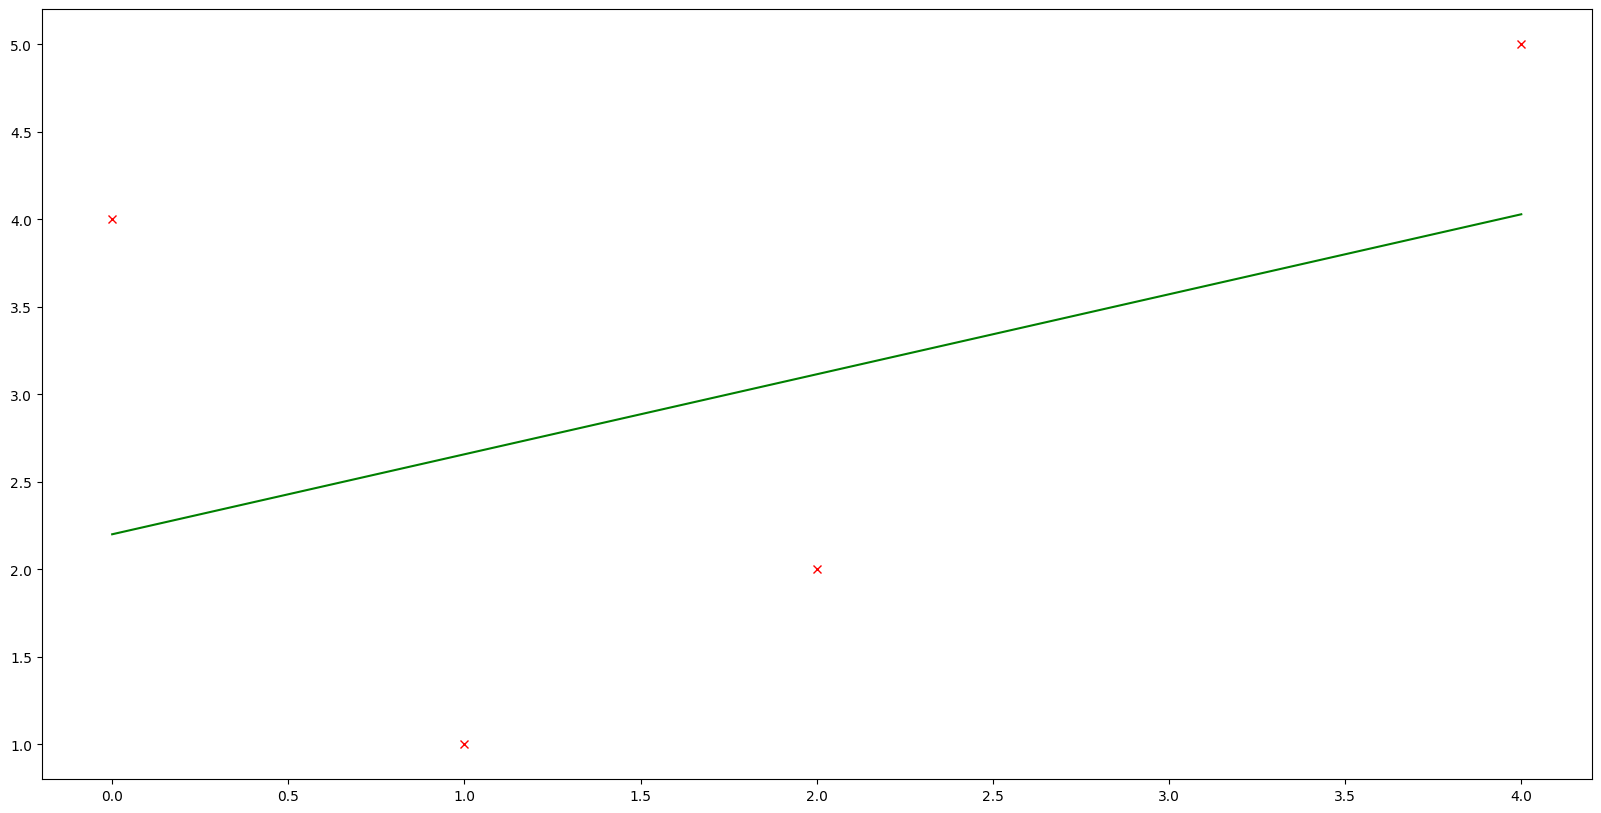

In [94]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
plt.plot(X, y, 'rx')
h = design_matrix @ w
plt.plot(X, h, 'g')

# increase plot size
plt.rcParams["figure.figsize"] = (20, 10)

def error(y: np.ndarray, h: np.ndarray) -> float:
    return 0.5 * sum([np.power(y_i  - h_i, 2) for y_i, h_i in zip(y, h)])

E = error(y, h)
print(f"Learning error is : {E}")

mse = mean_squared_error(y, h)
print(f"MSE is: {mse}")

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [68]:
# Vaš kôd ovdje
# w_no_pseudo = linalg.inv(design_matrix) @ y


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [69]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
regression = LinearRegression().fit(design_matrix, y)
print(f"Regression.coef: {regression.coef_}, regression.intercept: {regression.intercept_}")

predictions = regression.predict(design_matrix)
mse_linreg = mean_squared_error(y, predictions)

print(f"MSE with LinearRegression is: {mse_linreg}, compared to MSE from sklearn.metrics which is: {mse}. Diff is: {mse_linreg - mse}") 

Regression.coef: [0.         0.45714286], regression.intercept: 2.2
MSE with LinearRegression is: 2.0428571428571427, compared to MSE from sklearn.metrics which is: 2.0428571428571427. Diff is: 0.0


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [70]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return np.array([np.array([f(x[0]) + normal(0, noise)]) for x in X])

In [71]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [72]:
# Vaš kôd ovdje
instances = make_instances(-5, 5, 50)
labels = make_labels(instances, lambda x: 5 + x - 2 * (x ** 2) - 5 * (x ** 3), 200)
labels

array([[ 527.89466083],
       [  89.77367836],
       [ 573.58022376],
       [ 612.230727  ],
       [ 465.61618701],
       [ 375.47397291],
       [ -88.29173079],
       [ 352.68240244],
       [ -18.51631193],
       [-124.4629027 ],
       [ 157.47376647],
       [-126.39724219],
       [ 293.79307281],
       [-543.04585909],
       [ 519.62647803],
       [-328.17906688],
       [-366.86181743],
       [ 116.78824813],
       [ 147.37082831],
       [ 287.45049429],
       [  97.07891893],
       [  27.16853684],
       [  11.4306065 ],
       [ 217.42953926],
       [ -23.37977045],
       [ 105.22852269],
       [  64.49150465],
       [-167.99599444],
       [-144.56128628],
       [ 263.46565006],
       [  32.52477626],
       [  35.16103348],
       [-204.59345366],
       [ 279.22594827],
       [  86.11539643],
       [-176.66155988],
       [-112.48564057],
       [ 215.39394328],
       [-245.38159936],
       [  65.25955767],
       [  97.44725867],
       [-457.232

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

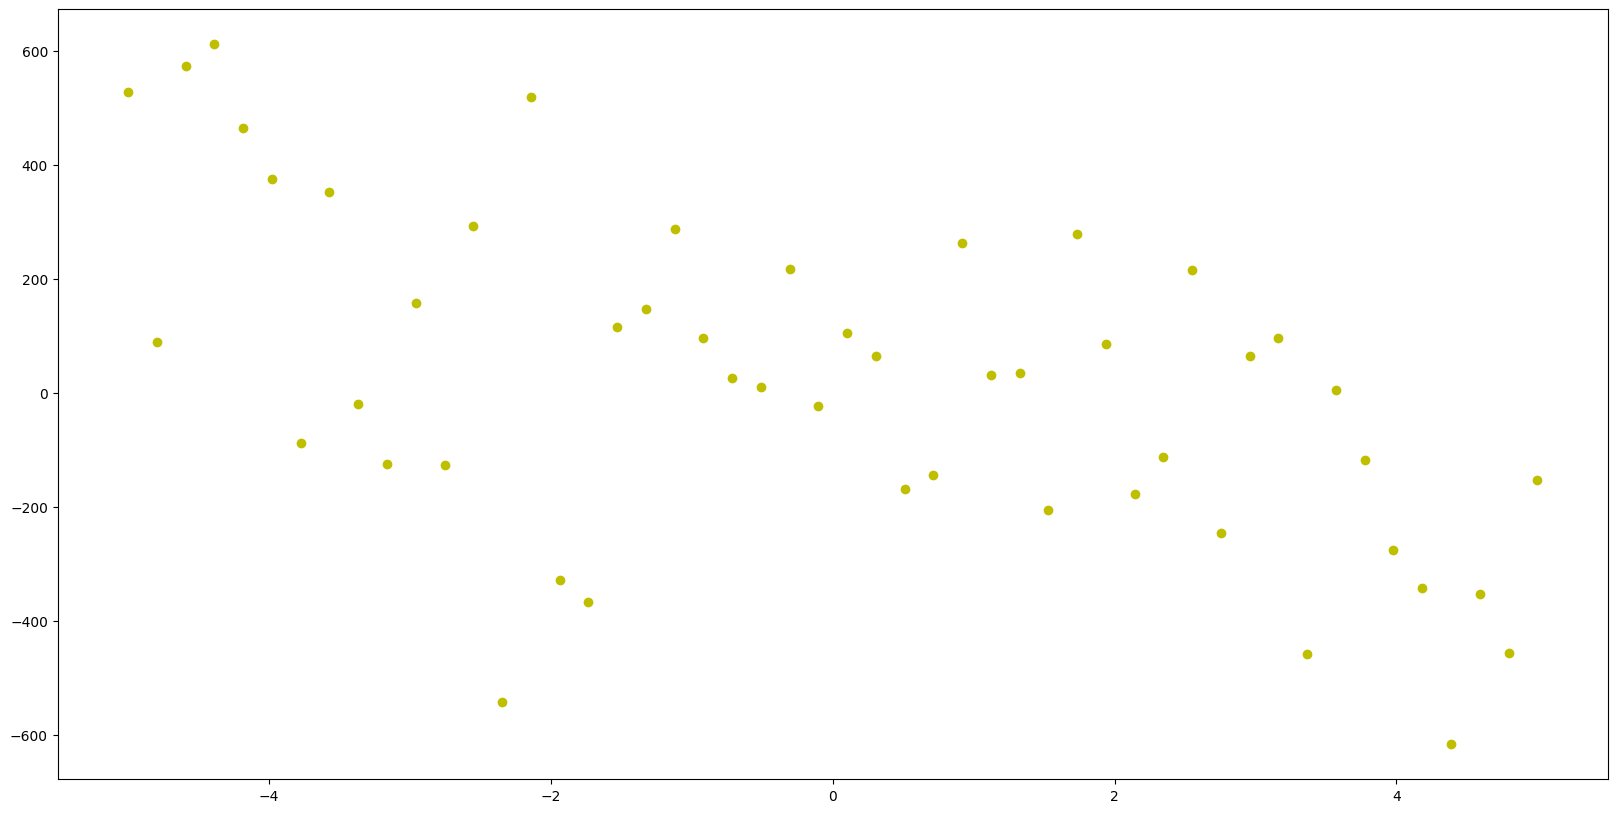

In [73]:
# Vaš kôd ovdje
plt.scatter(instances, labels, c='y')

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

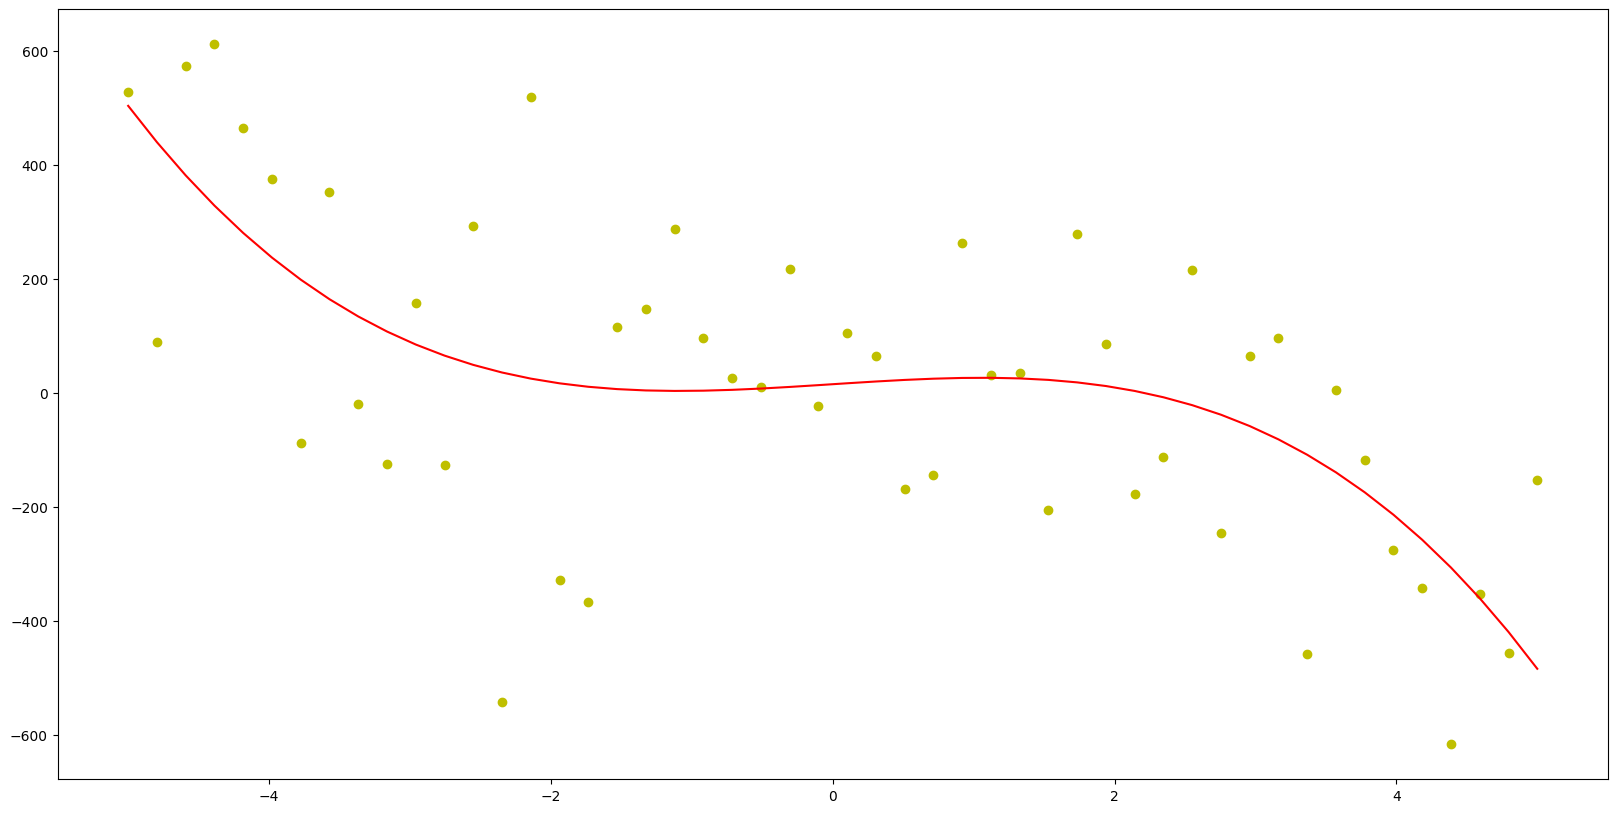

In [74]:
# Vaš kôd ovdje
poly_3 = PolynomialFeatures(3)
phi_d3 = poly_3.fit_transform(instances)
reg_d3 = LinearRegression().fit(phi_d3, labels)
predictions_d3 = reg_d3.predict(phi_d3)
plt.scatter(instances, labels, c='y')
plt.plot(instances, predictions_d3, c='r')

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Degree: 1, MSE: 56650.677734489786
Degree: 3, MSE: 48186.11498737116
Degree: 5, MSE: 46427.02960299369
Degree: 10, MSE: 41156.91411619701
Degree: 20, MSE: 35140.26386554036


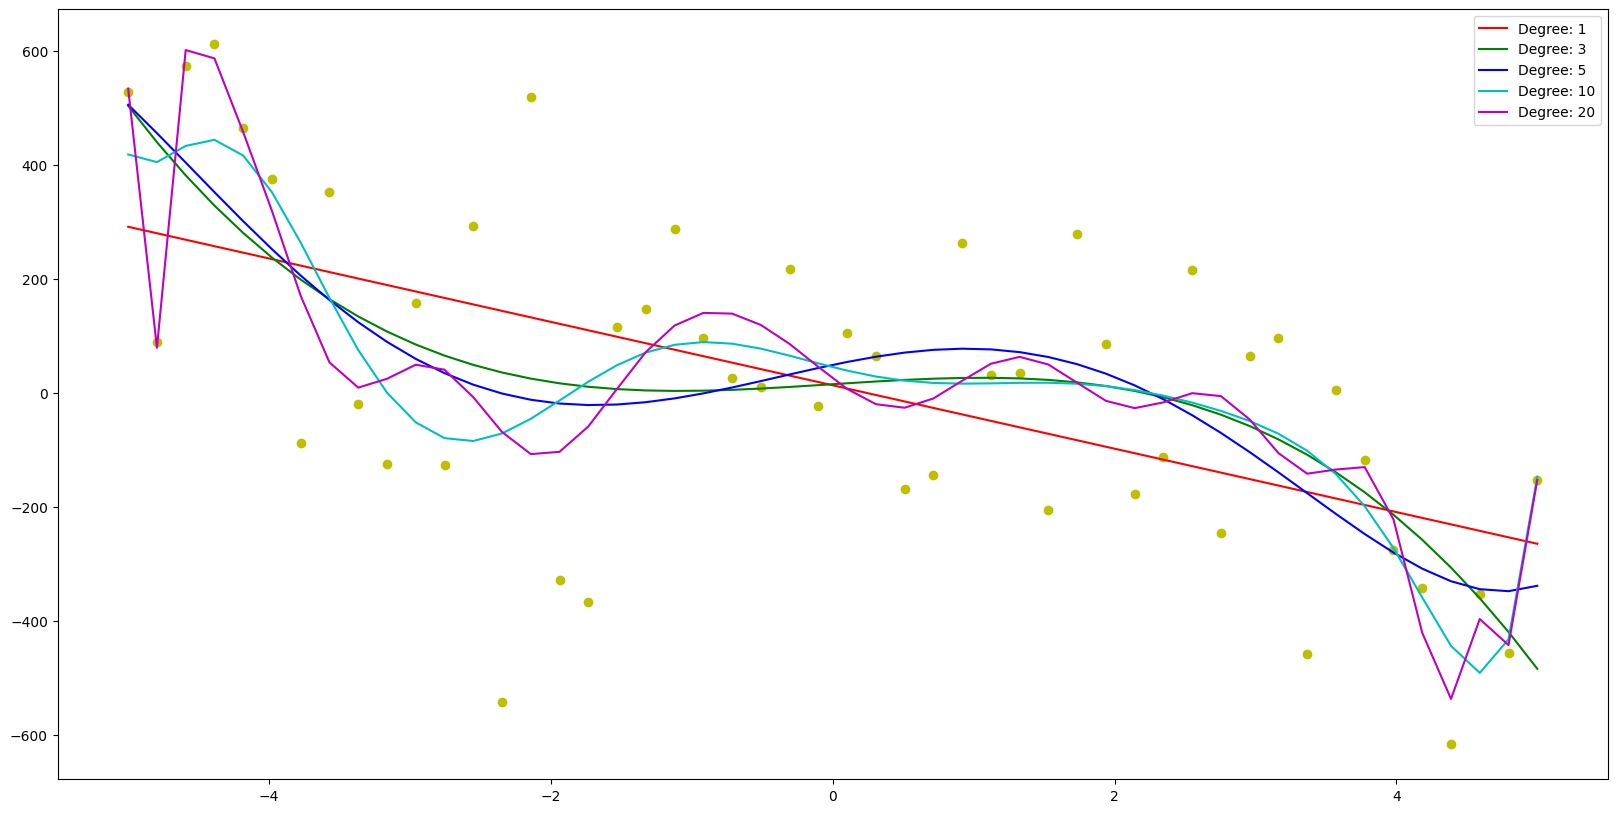

In [75]:
# Vaš kôd ovdje

degrees = [1, 3, 5, 10, 20]
colors = ['r', 'g', 'b', 'c', 'm']

plt.scatter(instances, labels, c='y')

for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree)
    phi_d = poly.fit_transform(instances)
    reg = LinearRegression().fit(phi_d, labels)
    predictions = reg.predict(phi_d)
    plt.plot(instances, predictions, c=color, label=f"Degree: {degree}")
    print(f"Degree: {degree}, MSE: {mean_squared_error(labels, predictions)}")

plt.legend()
plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

Degree: 1, MSE train: 71227.9164391865, MSE test: 45653.27993769093
Degree: 2, MSE train: 70390.78750911632, MSE test: 48017.6511651029
Degree: 3, MSE train: 55087.28238607809, MSE test: 48531.655765461415
Degree: 4, MSE train: 54366.21810069752, MSE test: 47586.447451706335
Degree: 5, MSE train: 49844.24839033718, MSE test: 55037.3417805057
Degree: 6, MSE train: 38594.54237989416, MSE test: 101530.5320304941
Degree: 7, MSE train: 33531.90270300328, MSE test: 98686.40903413719
Degree: 8, MSE train: 33437.53999896214, MSE test: 104701.07399305586
Degree: 9, MSE train: 30427.508109962564, MSE test: 118006.59709661039
Degree: 10, MSE train: 30007.02248155322, MSE test: 149766.62241964036
Degree: 11, MSE train: 17604.957990796516, MSE test: 373472.32267389016
Degree: 12, MSE train: 16964.874304448265, MSE test: 477997.9978407215
Degree: 13, MSE train: 14975.821692946025, MSE test: 1177212.2476574292
Degree: 14, MSE train: 10507.666194825191, MSE test: 2439999.0645820694
Degree: 15, MSE tra

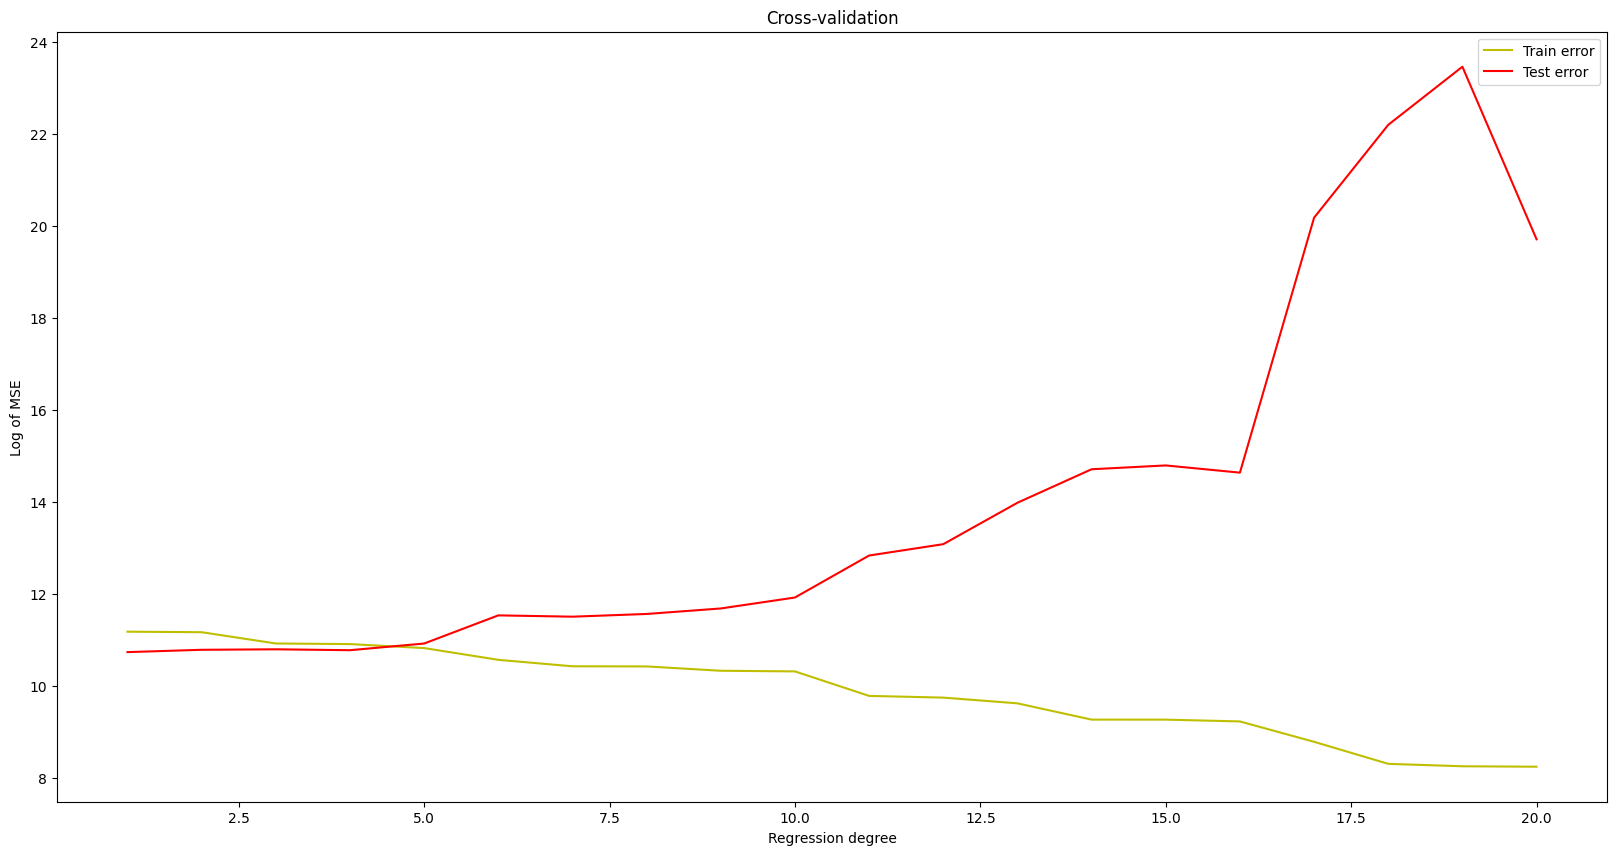

In [76]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

degrees = [i for i in range(1, 21)]

instances_train, instances_test, labels_train, labels_test = train_test_split(instances, labels, test_size=0.5)

errors_train = []
errors_test = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    phi_train_transformed = poly.fit_transform(instances_train)
    phi_test_transformed = poly.fit_transform(instances_test)
    reg = LinearRegression().fit(phi_train_transformed, labels_train)
    predictions_train = reg.predict(phi_train_transformed)
    predictions_test = reg.predict(phi_test_transformed)
    mse_train = mean_squared_error(labels_train, predictions_train)
    mse_test = mean_squared_error(labels_test, predictions_test)
    
    errors_train.append(mse_train)
    errors_test.append(mse_test)
    
    print(f"Degree: {degree}, MSE train: {mse_train}, MSE test: {mse_test}")
    
plt.plot(degrees, np.log(errors_train), color='y', label="Train error")
plt.plot(degrees, np.log(errors_test), color='r', label="Test error")
plt.legend()
plt.xlabel("Regression degree")
plt.ylabel("Log of MSE")
plt.title("Cross-validation")
    
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

Sigma: 100, sample size: 0.33
Train size: 165, test size: 165
Train labels size: 165, test labels size: 165
Instances train transformed shape: (165, 2)
Instances test transformed shape: (165, 2)
Labels train shape: (165, 1)
Labels test shape: (165, 1)
Degree: 1, MSE train: 17417.82270620537, MSE test: 19949.923898734673
--------------------------------------------------------------
Instances train transformed shape: (165, 3)
Instances test transformed shape: (165, 3)
Labels train shape: (165, 1)
Labels test shape: (165, 1)
Degree: 2, MSE train: 16506.41267368545, MSE test: 19583.291397872716
--------------------------------------------------------------
Instances train transformed shape: (165, 4)
Instances test transformed shape: (165, 4)
Labels train shape: (165, 1)
Labels test shape: (165, 1)
Degree: 3, MSE train: 8967.678085081472, MSE test: 9587.673864640066
--------------------------------------------------------------
Instances train transformed shape: (165, 5)
Instances test tra

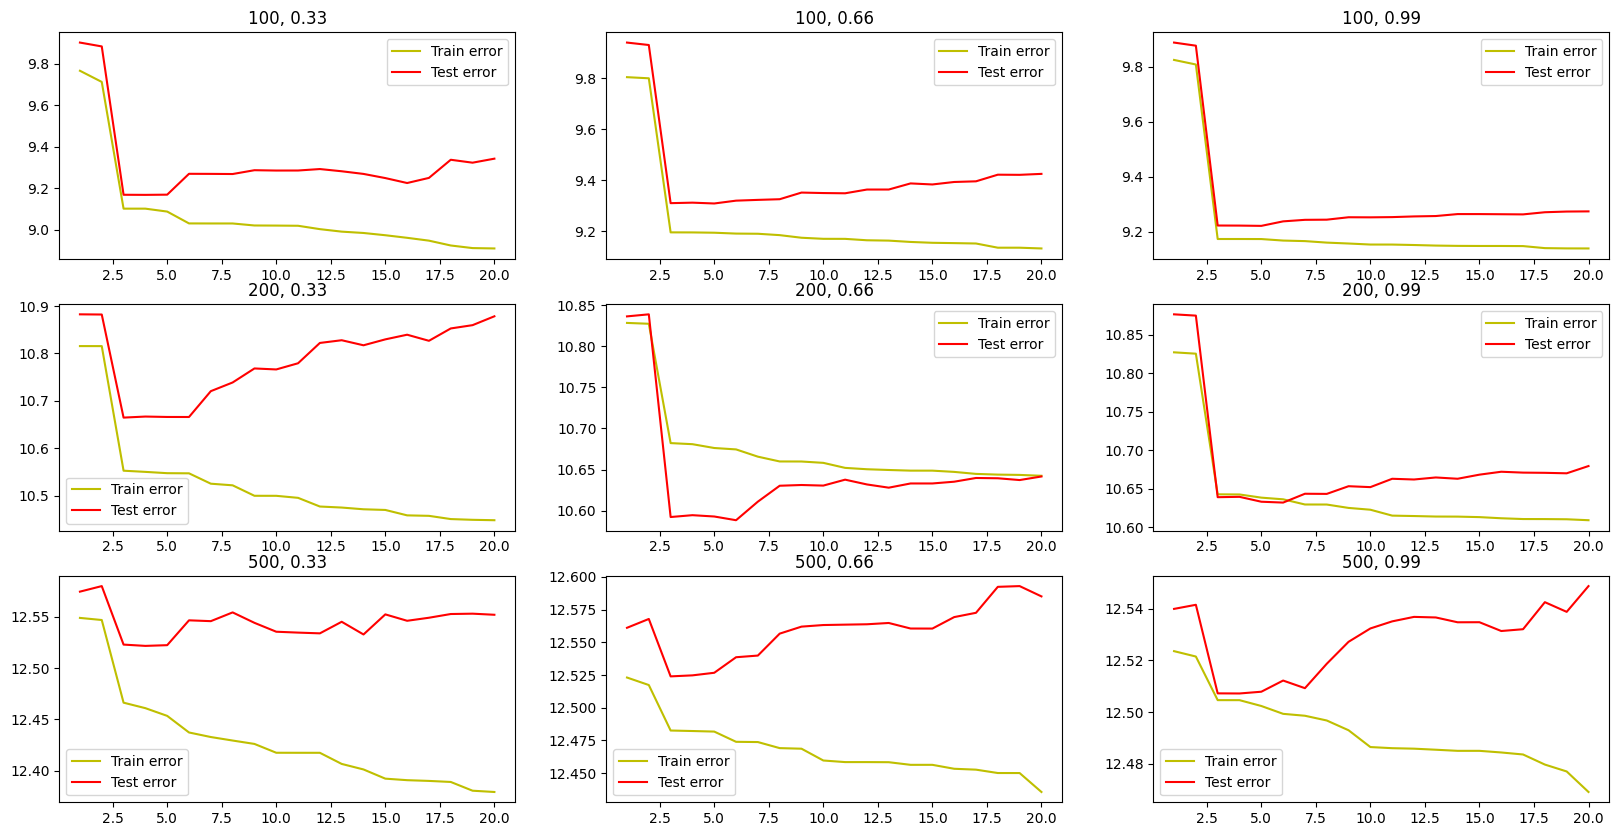

In [92]:
# Vaš kôd ovdje
instances_1k = make_instances(-5, 5, 1000)
instances_train, instances_test = train_test_split(instances_1k, test_size=0.5)

sigmas = [100, 200, 500]

degrees = [i for i in range(1, 21)]

labels_train, labels_test = [], []

for sigma in sigmas:
    labels_train.append(make_labels(instances_train, lambda x: 5 + x - 2 * (x ** 2) - 5 * (x ** 3), sigma))
    labels_test.append(make_labels(instances_test, lambda x: 5 + x - 2 * (x ** 2) - 5 * (x ** 3), sigma))

sample_sizes = [0.33, 0.66, 0.99]

# tryout_degree = 2
# poly = PolynomialFeatures(tryout_degree)
# instances_train_subset, _, labels_train_subset, _ = train_test_split(instances_train, labels_train[0], train_size=0.01)
# instances_test_subset, _, labels_test_subset, _ = train_test_split(instances_test, labels_test[0], train_size=0.01)
# instances_train_transformed = poly.fit_transform(instances_train_subset)
# instances_test_transformed = poly.fit_transform(instances_test_subset)
# print(f"Instances train transformed shape: {instances_train_transformed.shape}")
# print(f"Labels train shape: {labels_train_subset.shape}")
# 
# reg = LinearRegression().fit(instances_train_transformed, labels_train_subset)
# predictions_train = reg.predict(instances_train_transformed)
# mse_train = mean_squared_error(labels_train_subset, predictions_train)
# print(f"Degree: {tryout_degree}, MSE train: {mse_train}")
# 
# predictions_test = reg.predict(instances_test_transformed)
# mse_test = mean_squared_error(labels_test_subset, predictions_test)
# print(f"Degree: {tryout_degree}, MSE test: {mse_test}")
# 
# plt.plot(instances_train_subset, labels_train_subset, 'rx')
# plt.plot(instances_test_subset, labels_test_subset, 'bx')
# plt.plot(instances_train_subset, predictions_train, 'g+')
# plt.plot(instances_test_subset, predictions_test, 'y+')
# 
# plt.show()

for sigma in sigmas:
    for sample_size in sample_sizes:
        print(f"Sigma: {sigma}, sample size: {sample_size}")
        instances_train_sampled, _, labels_train_sampled, _ = train_test_split(instances_train, labels_train[sigmas.index(sigma)], train_size=sample_size)
        _, instances_test_sampled, _, labels_test_sampled = train_test_split(instances_test, labels_test[sigmas.index(sigma)], test_size=sample_size)

        print(f"Train size: {len(instances_train_sampled)}, test size: {len(instances_test_sampled)}")
        print(f"Train labels size: {len(labels_train_sampled)}, test labels size: {len(labels_test_sampled)}")

        errors_train = []
        errors_test = []

        for degree in degrees:
            poly = PolynomialFeatures(degree)
            phi_train_transformed = poly.fit_transform(instances_train_sampled)
            phi_test_transformed = poly.fit_transform(instances_test_sampled)
            print(f"Instances train transformed shape: {phi_train_transformed.shape}")
            print(f"Instances test transformed shape: {phi_test_transformed.shape}")
            print(f"Labels train shape: {labels_train_sampled.shape}")
            print(f"Labels test shape: {labels_test_sampled.shape}")
            reg = LinearRegression().fit(phi_train_transformed, labels_train_sampled)
            predictions_train = reg.predict(phi_train_transformed)
            predictions_test = reg.predict(phi_test_transformed)
            mse_train = mean_squared_error(labels_train_sampled, predictions_train)
            mse_test = mean_squared_error(labels_test_sampled, predictions_test)

            errors_train.append(mse_train)
            errors_test.append(mse_test)

            print(f"Degree: {degree}, MSE train: {mse_train}, MSE test: {mse_test}")
            print("--------------------------------------------------------------")

        print(f"Plot no {sigmas.index(sigma) * 3 + sample_sizes.index(sample_size) + 1}")
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        plt.subplot(3, 3, sigmas.index(sigma) * 3 + sample_sizes.index(sample_size) + 1)
        plt.plot(degrees, np.log(errors_train), color='y', label="Train error")
        plt.plot(degrees, np.log(errors_test), color='r', label="Test error")
        plt.title(f"{sigma}, {sample_size}")
        plt.legend()

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [78]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
phi_d3 = poly.fit_transform(X)
lambdas = [0, 1, 10]

def weights(phi: np.ndarray, y: np.ndarray, lambda_: int):
    i = np.identity(phi.shape[1])
    i[0][0] = 0
    return linalg.inv(phi.T @ phi + lambda_ * i) @ phi.T @ y

for l in lambdas:
    print(f"Lambda: {l}, weights: {weights(phi_d3, y, l)}")


Lambda: 0, weights: [ 4.         -5.91666667  3.375      -0.45833333]
Lambda: 1, weights: [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda: 10, weights: [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [79]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(phi_d3, y)
    print(f"Lambda: {l}, weights: {ridge.coef_}, intercept: {ridge.intercept_}")
    
# iste su
    

Lambda: 0, weights: [ 0.         -5.91666667  3.375      -0.45833333], intercept: 3.9999999999999645
Lambda: 1, weights: [ 0.         -0.69079365 -0.2831746   0.1445805 ], intercept: 3.0569614512471652
Lambda: 10, weights: [ 0.         -0.15897295 -0.13423067  0.0815601 ], intercept: 2.494441843122973


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

Lambda: 0, degree: 2
Lambda: 0, degree: 10
Lambda: 100, degree: 2
Lambda: 100, degree: 10


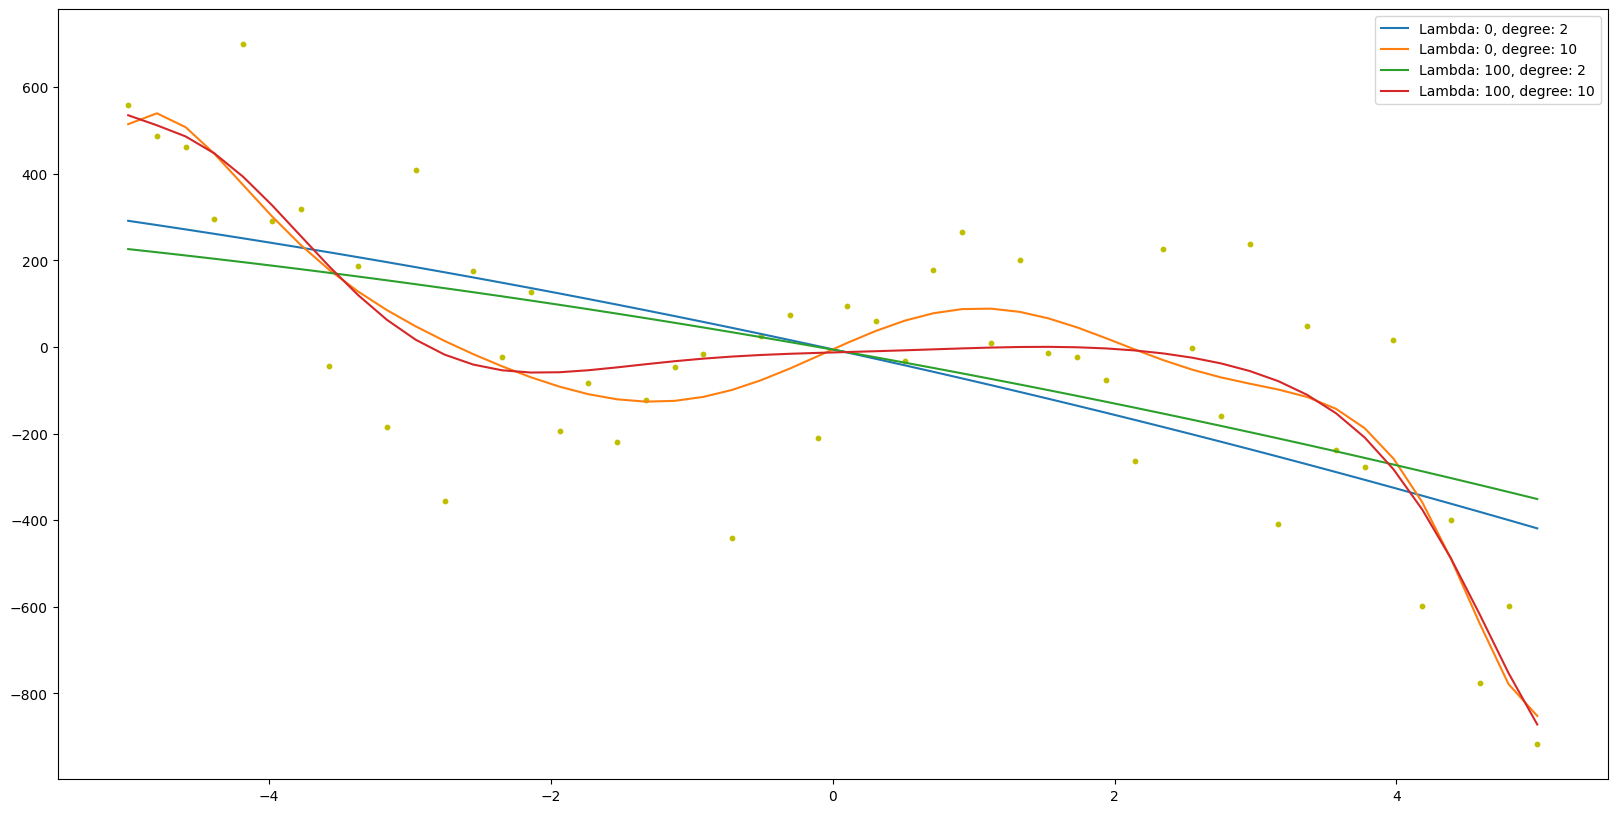

In [93]:
# Vaš kôd ovdje
instances = make_instances(-5, 5, 50)
labels = make_labels(instances, lambda x: 5 + x - 2 * (x ** 2) - 5 * (x ** 3), 200)

lambdas = [0, 100]
degrees = [2, 10]

plt.scatter(instances, labels, c='y', s=10)

for l in lambdas:
    for degree in degrees:
        print(f"Lambda: {l}, degree: {degree}")
        ridge = Ridge(alpha=l)
        phi_d = PolynomialFeatures(degree).fit_transform(instances)
        ridge.fit(phi_d, labels)
        ridge_predictions = ridge.predict(phi_d)
        plt.plot(instances, ridge_predictions, label=f"Lambda: {l}, degree: {degree}")
        
plt.legend()        
plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


Lambda: 0, MSE train: 20154.89662232555, MSE test: 42174.94480866296
Lambda: 1, MSE train: 20465.16057614398, MSE test: 38748.798172133065
Lambda: 2, MSE train: 20859.193450556428, MSE test: 37352.529366945746
Lambda: 3, MSE train: 21190.002523667463, MSE test: 36560.78698239501
Lambda: 4, MSE train: 21457.559299403125, MSE test: 36048.095110470334
Lambda: 5, MSE train: 21674.824565605544, MSE test: 35689.09962425874
Lambda: 6, MSE train: 21853.491924992326, MSE test: 35423.988716551874
Lambda: 7, MSE train: 22002.481960171423, MSE test: 35220.42821992888
Lambda: 8, MSE train: 22128.382882474572, MSE test: 35059.38385052107
Lambda: 9, MSE train: 22236.062484507467, MSE test: 34928.9207820404
Lambda: 10, MSE train: 22329.15604030928, MSE test: 34821.17901364857
Lambda: 11, MSE train: 22410.416191660977, MSE test: 34730.773506252386
Lambda: 12, MSE train: 22481.957414711065, MSE test: 34653.89270690285
Lambda: 13, MSE train: 22545.42668731857, MSE test: 34587.76394200195
Lambda: 14, MSE 

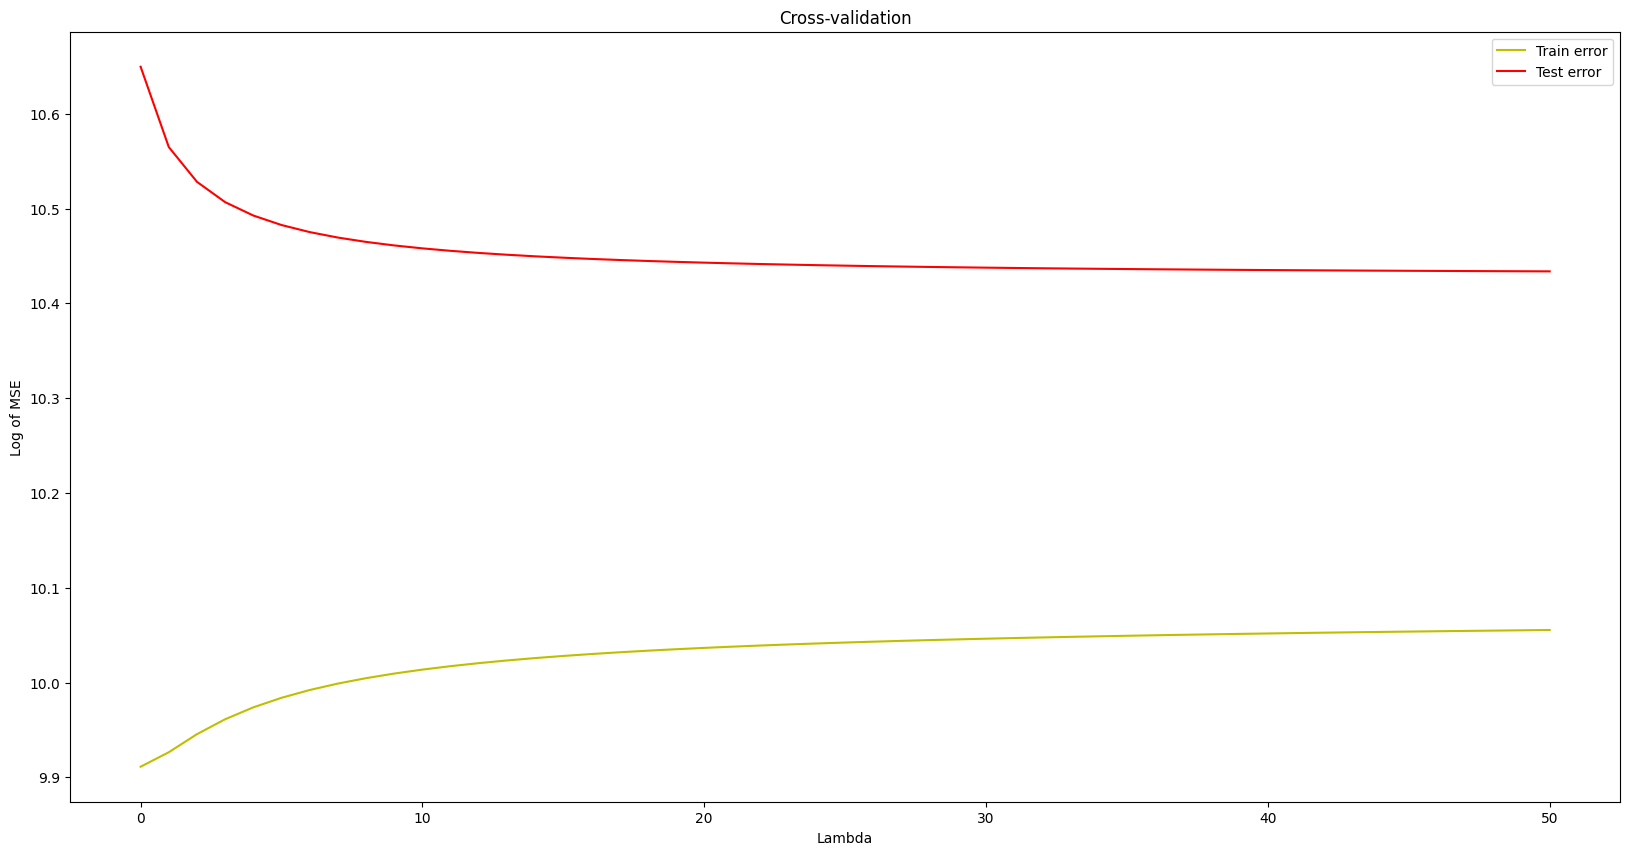

In [81]:
# Vaš kôd ovdje
instances_train, instances_test, labels_train, labels_test = train_test_split(instances, labels, test_size=0.5)
lambdas = [i for i in range(0, 51)]

errors_train = []
errors_test = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    
    phi_train = PolynomialFeatures(10).fit_transform(instances_train)
    phi_test = PolynomialFeatures(10).fit_transform(instances_test)
    
    ridge.fit(phi_train, labels_train)
    
    predictions_train = ridge.predict(phi_train)
    predictions_test = ridge.predict(phi_test)
    
    mse_train = mean_squared_error(labels_train, predictions_train)
    mse_test = mean_squared_error(labels_test, predictions_test)
    
    errors_train.append(mse_train)
    errors_test.append(mse_test)
    
    print(f"Lambda: {l}, MSE train: {mse_train}, MSE test: {mse_test}")
    
plt.plot(lambdas, np.log(errors_train), color='y', label="Train error")
plt.plot(lambdas, np.log(errors_test), color='r', label="Test error")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Log of MSE")
plt.title("Cross-validation")

plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [82]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
No of non-zero weights:  5
N

Text(0.5, 1.0, 'Norms')

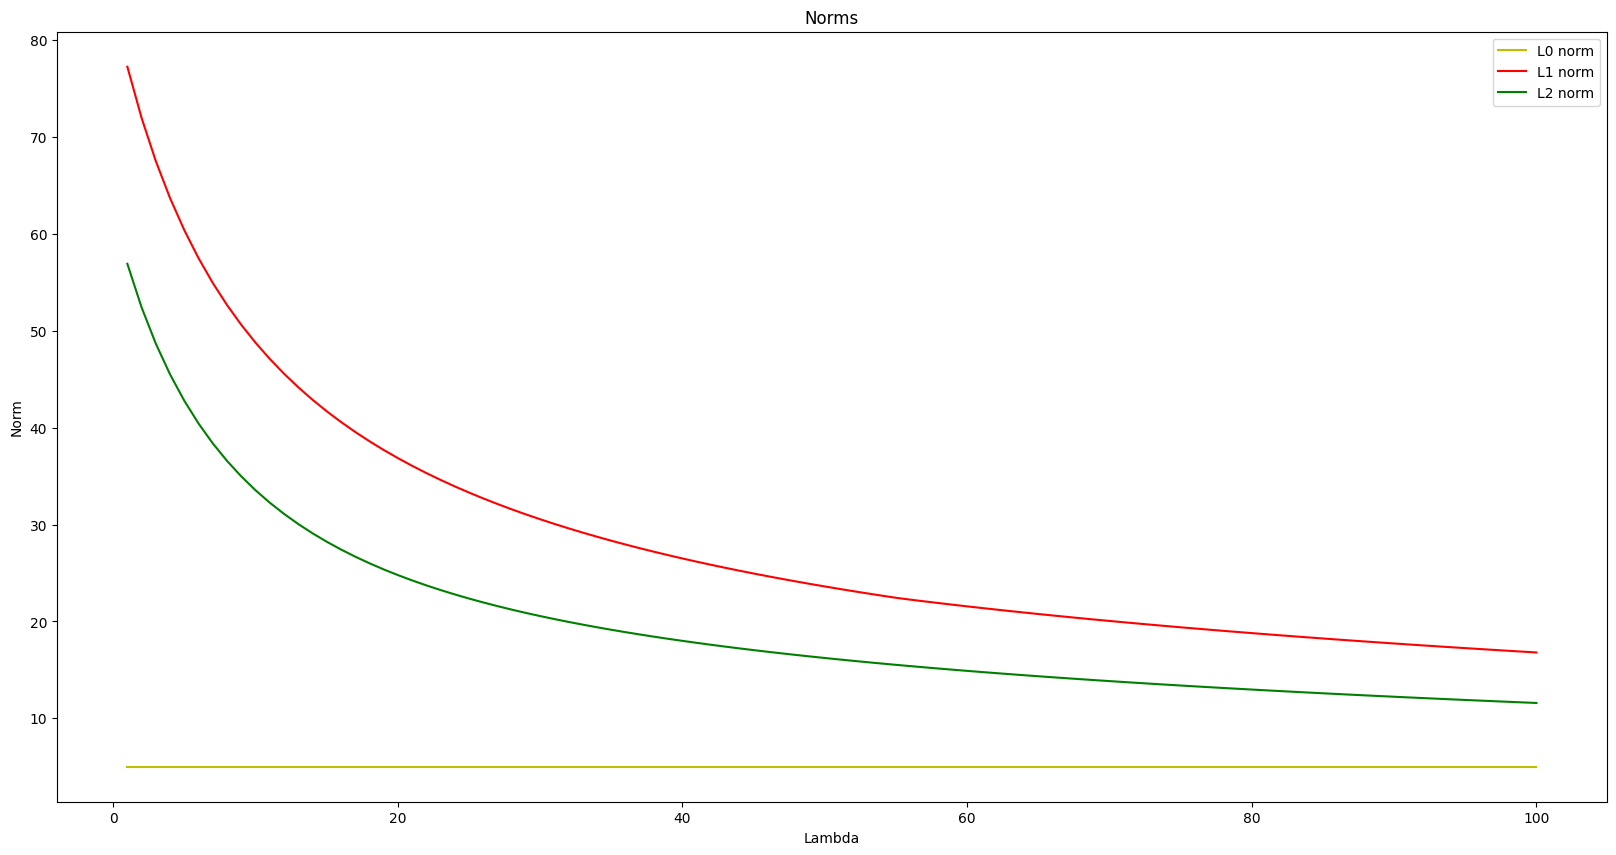

In [83]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

lambdas = [i for i in range(1, 101)]

l0_norms = []
l1_norms = []
l2_norms = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    phi_train = PolynomialFeatures(5).fit_transform(instances_train)
    phi_test = PolynomialFeatures(5).fit_transform(instances_test)
    
    ridge.fit(phi_train, labels_train)
    
    l0_norms.append(nonzeroes(ridge.coef_[0]))
    l1_norms.append(linalg.norm(ridge.coef_[0], ord=1))
    l2_norms.append(linalg.norm(ridge.coef_[0], ord=2))
    
    print("No of non-zero weights: ", nonzeroes(ridge.coef_[0]))
    
plt.plot(lambdas, l0_norms, color='y', label="L0 norm")
plt.plot(lambdas, l1_norms, color='r', label="L1 norm")
plt.plot(lambdas, l2_norms, color='g', label="L2 norm")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Norm")
plt.title("Norms")

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

Lambda: 1; No of non-zero weights: 5
Lambda: 2; No of non-zero weights: 5
Lambda: 3; No of non-zero weights: 5
Lambda: 4; No of non-zero weights: 5
Lambda: 5; No of non-zero weights: 5
Lambda: 6; No of non-zero weights: 5
Lambda: 7; No of non-zero weights: 5
Lambda: 8; No of non-zero weights: 5
Lambda: 9; No of non-zero weights: 5
Lambda: 10; No of non-zero weights: 5
Lambda: 11; No of non-zero weights: 5
Lambda: 12; No of non-zero weights: 5
Lambda: 13; No of non-zero weights: 5
Lambda: 14; No of non-zero weights: 5
Lambda: 15; No of non-zero weights: 5
Lambda: 16; No of non-zero weights: 5
Lambda: 17; No of non-zero weights: 5
Lambda: 18; No of non-zero weights: 4
Lambda: 19; No of non-zero weights: 4
Lambda: 20; No of non-zero weights: 4
Lambda: 21; No of non-zero weights: 4
Lambda: 22; No of non-zero weights: 4
Lambda: 23; No of non-zero weights: 4
Lambda: 24; No of non-zero weights: 5
Lambda: 25; No of non-zero weights: 5
Lambda: 26; No of non-zero weights: 5
Lambda: 27; No of non

Text(0.5, 1.0, 'Norms')

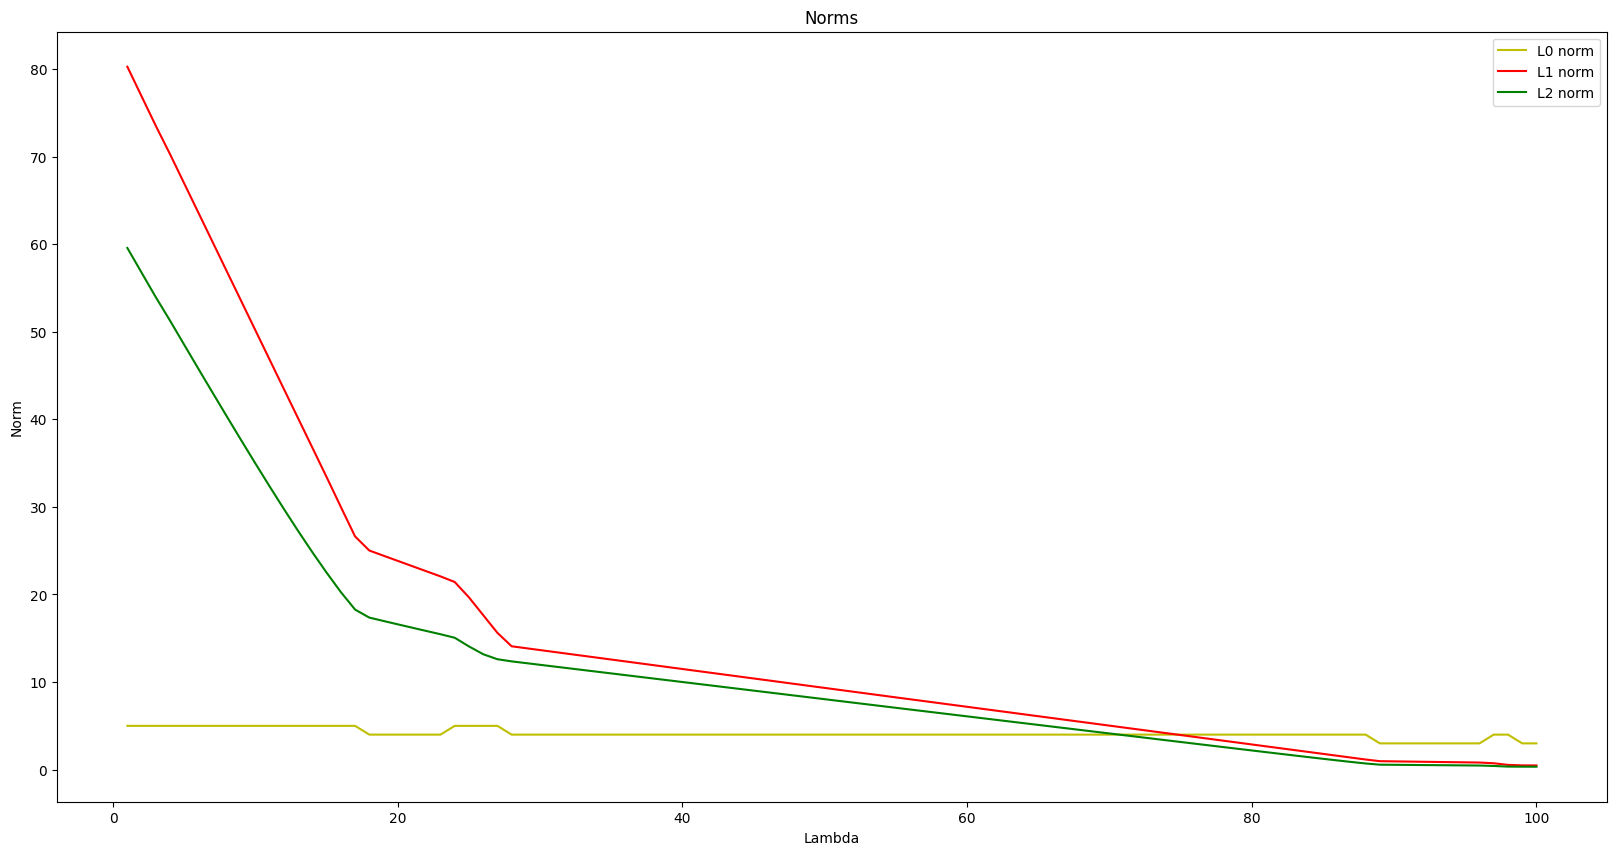

In [84]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

lambdas = [i for i in range(1, 101)]

l0_norms = []
l1_norms = []
l2_norms = []

for l in lambdas:
    lasso = Lasso(alpha=float(l))
    phi_train = PolynomialFeatures(5).fit_transform(instances_train)
    phi_test = PolynomialFeatures(5).fit_transform(instances_test)
    
    lasso.fit(phi_train, labels_train)
    
    l0_norms.append(nonzeroes(lasso.coef_[1:]))
    l1_norms.append(linalg.norm(lasso.coef_[1:], ord=1))
    l2_norms.append(linalg.norm(lasso.coef_[1:], ord=2))

    print(f"Lambda: {l}; No of non-zero weights: {nonzeroes(lasso.coef_[1:])}")
    
plt.plot(lambdas, l0_norms, color='y', label="L0 norm")
plt.plot(lambdas, l1_norms, color='r', label="L1 norm")
plt.plot(lambdas, l2_norms, color='g', label="L2 norm")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Norm")
plt.title("Norms")

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [85]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 1.0, 'Grade in college vs exam score in college application')

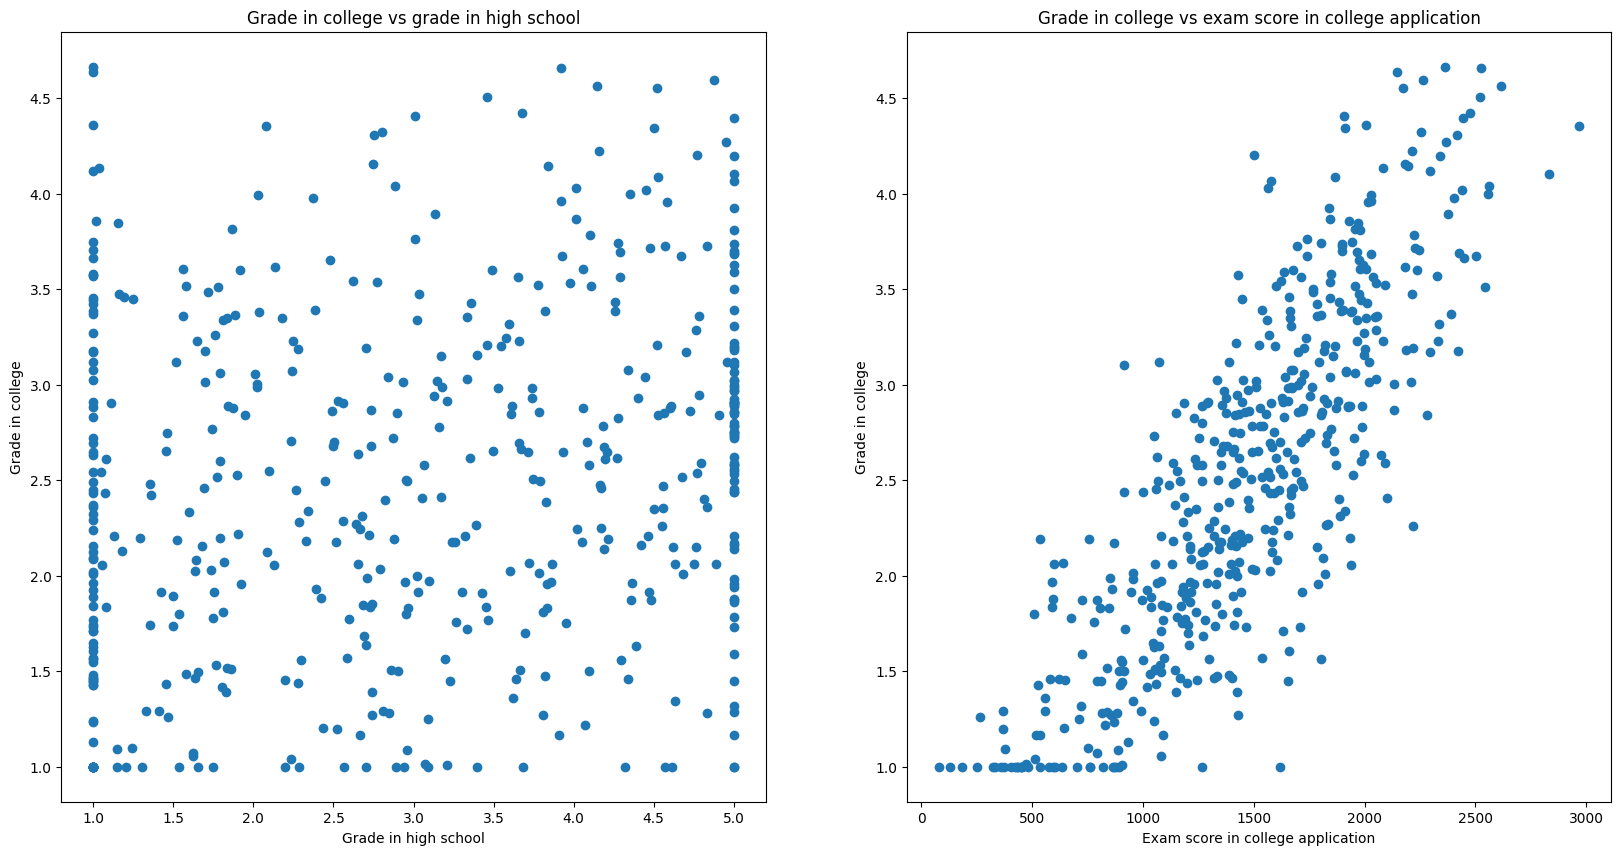

In [86]:
# Vaš kôd ovdje
plt.subplot(1, 2, 1)
plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("Grade in high school")
plt.ylabel("Grade in college")
plt.title("Grade in college vs grade in high school")

plt.subplot(1, 2, 2)
plt.scatter(exam_score, grades_y)
plt.xlabel("Exam score in college application")
plt.ylabel("Grade in college")
plt.title("Grade in college vs exam score in college application")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [87]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X, grades_y)
print(f"Weights: {ridge.coef_}")

Weights: [0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [88]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler_X = StandardScaler()
scaler_y = StandardScaler()

grades_y_reshaped = grades_y.reshape(grades_y.size, 1)

scaler_X.fit(grades_X)
scaler_y.fit(grades_y_reshaped)

grades_X_fixed = scaler_X.transform(grades_X)
grades_y_fixed = scaler_y.transform(grades_y_reshaped)

ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed, grades_y_fixed)
print(f"Weights: {ridge.coef_}")


Weights: [[0.81630375 0.15167761]]


#**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [89]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, grades_X_fixed[:, -1]))
grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [90]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(f"Weights: {ridge.coef_}")

Weights: [[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [91]:
# Vaš kôd ovdje
lambdas = [0.01, 1000]
std_lambda_0_01 = {}
std_lambda_1000 = {}
for x in range(10):
    instances_train, instances_test, labels_train, labels_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    for l in lambdas:
        ridge = Ridge(alpha=l)
        ridge.fit(instances_train, labels_train)
        print(f"Weights: {ridge.coef_}")
        if l == 0.01:
            for i in range(len(ridge.coef_[0])):
                if i in std_lambda_0_01:
                    std_lambda_0_01[i].append(ridge.coef_[0][i])
                else:
                    std_lambda_0_01[i] = [ridge.coef_[0][i]]
        else:
            for i in range(len(ridge.coef_[0])):
                if i in std_lambda_1000:
                    std_lambda_1000[i].append(ridge.coef_[0][i])
                else:
                    std_lambda_1000[i] = [ridge.coef_[0][i]]
                    
for weight in std_lambda_0_01:
    print(f"Lambda: 0.01, Weight: {weight}, std: {np.std(std_lambda_0_01[weight])}")

for weight in std_lambda_1000:
    print(f"Lambda: 1000, Weight: {weight}, std: {np.std(std_lambda_1000[weight])}")
        

Weights: [[0.79385128 0.06504303 0.06504303]]
Weights: [[0.16436364 0.03812874 0.03812874]]
Weights: [[0.80739011 0.0761075  0.0761075 ]]
Weights: [[0.15992321 0.02415424 0.02415424]]
Weights: [[0.814158   0.07673386 0.07673386]]
Weights: [[0.16128257 0.02717137 0.02717137]]
Weights: [[0.83265053 0.07483515 0.07483515]]
Weights: [[0.16579999 0.03405283 0.03405283]]
Weights: [[0.79735626 0.08013669 0.08013669]]
Weights: [[0.15703356 0.02664742 0.02664742]]
Weights: [[0.81845427 0.04525193 0.04525193]]
Weights: [[0.17833349 0.03188297 0.03188297]]
Weights: [[0.80086373 0.0614553  0.0614553 ]]
Weights: [[0.15563723 0.022474   0.022474  ]]
Weights: [[0.81216485 0.06648337 0.06648337]]
Weights: [[0.16174675 0.03077003 0.03077003]]
Weights: [[0.81501911 0.04444567 0.04444567]]
Weights: [[0.16591703 0.01772788 0.01772788]]
Weights: [[0.81925961 0.07443972 0.07443972]]
Weights: [[0.16617211 0.03087282 0.03087282]]
Lambda: 0.01, Weight: 0, std: 0.011026717248037233
Lambda: 0.01, Weight: 1, std:

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.